In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/uncleaned-laptop-price-dataset/laptopData.csv


# Background behind this exploration:
I wanted to see the different types of laptops that would fall in my price range considering that I might upgrade my current laptop after I get my first freelance contract. 

Per usual, I cleaned all the na's in the dataset and created a working dataframe.

I first looked at the first quartile to see if there's anything in the lower price range that might meet my 12GB and 16GB RAM requirements.  
As it turns out, nothing met my RAM requirements above. 😅

So I moved to the second quartile of price ranges.
I was left with 12 options, and only 3 had 16GB RAM.

Lastly, I printed out the 3 options at 16GB and that have lower price.  😄

# **Purpose of Exploration:**  <br>What are the different kinds of laptops and their price ranges for a person with a certain budget? 
### Price point is the first decision point, then RAM, then possibly SSD vs. HDD as tiebreaker.  
### Brand and company are not as important.

# Importing the dataset, df0 is original, df is the working dataset
/kaggle/input/uncleaned-laptop-price-dataset/laptopData.csv<br>
df0 is the original dataset<br>
df is the dataset with dropped na's<br>

In [2]:
df0 = pd.read_csv('/kaggle/input/uncleaned-laptop-price-dataset/laptopData.csv')
df0.head()


,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1.0,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2.0,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3.0,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


# Data Exploration

In [3]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1273 non-null   float64
 1   Company           1273 non-null   object 
 2   TypeName          1273 non-null   object 
 3   Inches            1273 non-null   object 
 4   ScreenResolution  1273 non-null   object 
 5   Cpu               1273 non-null   object 
 6   Ram               1273 non-null   object 
 7   Memory            1273 non-null   object 
 8   Gpu               1273 non-null   object 
 9   OpSys             1273 non-null   object 
 10  Weight            1273 non-null   object 
 11  Price             1273 non-null   float64
dtypes: float64(2), object(10)
memory usage: 122.3+ KB


In [4]:
df0.isna().sum()

Unnamed: 0          30
Company             30
TypeName            30
Inches              30
ScreenResolution    30
Cpu                 30
Ram                 30
Memory              30
Gpu                 30
OpSys               30
Weight              30
Price               30
dtype: int64

In [5]:
limit_drop = len(df0) *.05
limit_drop

65.15

### 30 is much smaller than 65 so we can drop all the na's

# Data Cleaning by dropping na's

In [6]:
df = df0.dropna()
df.isna().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

# Checking out the data that what we have

In [7]:
listcols = list(df.columns)
listcols

['Unnamed: 0',
 'Company',
 'TypeName',
 'Inches',
 'ScreenResolution',
 'Cpu',
 'Ram',
 'Memory',
 'Gpu',
 'OpSys',
 'Weight',
 'Price']

In [8]:
listcols = ['Company', 'TypeName', 'Inches', 'ScreenResolution', \
            'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price']

In [9]:
for item in listcols:
    print ('----------------------------------------')
    print (df[item].value_counts().sort_values(ascending = False))

----------------------------------------
Company
Lenovo       290
Dell         287
HP           266
Asus         156
Acer         103
MSI           53
Toshiba       47
Apple         21
Samsung        9
Mediacom       7
Razer          7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
LG             3
Huawei         2
Fujitsu        2
Name: count, dtype: int64
----------------------------------------
TypeName
Notebook              710
Gaming                203
Ultrabook             191
2 in 1 Convertible    116
Workstation            29
Netbook                24
Name: count, dtype: int64
----------------------------------------
Inches
15.6    640
14      192
17.3    162
13.3    161
12.5     38
11.6     31
12        6
13.9      6
13.5      5
12.3      5
15.4      4
15        4
10.1      3
35.6      3
24        2
13        2
18.4      1
27.3      1
33.5      1
?         1
31.6      1
17        1
14.1      1
11.3      1
25.6      1
Name: count, dtype: in

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


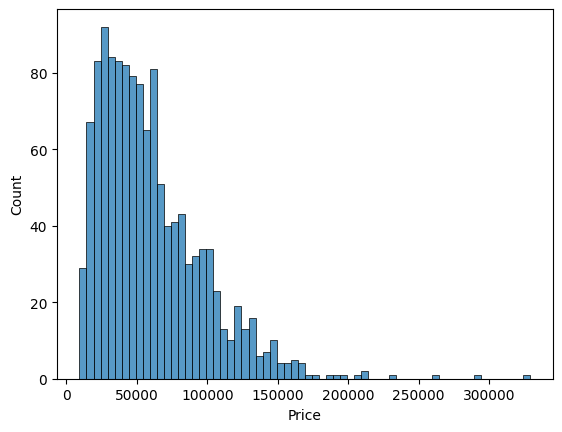

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(data = df['Price'], binwidth = 5000)
plt.show()

In [11]:
df['Price'].describe()

count      1273.000000
mean      59955.814073
std       37332.251005
min        9270.720000
25%       31914.720000
50%       52161.120000
75%       79333.387200
max      324954.720000
Name: Price, dtype: float64

# New price bins column using lambda function

In [12]:
bin_limits = [31914.72, 52161.12, 79333.387200]
df['price_bins'] = df['Price'].apply(lambda x: 
    "low" if x <= 31914.72 else
    "mid" if x <= 52161.12 else
    "high" if x <= 79333.387200 else
    "premium"
)
df['price_bins'].value_counts()

/tmp/ipykernel_18/1840489113.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price_bins'] = df['Price'].apply(lambda x:


price_bins
mid        323
low        320
premium    318
high       312
Name: count, dtype: int64

# Let's see what we have in each bin

In [13]:
mybudget_laptops = df[(df['price_bins'] == 'low') & (df['Ram'].isin(['12GB','16GB']))]
mybudget_laptops

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,price_bins


# Mid price is my new target because of the 12GB and 16GB requirement for my studies

In [14]:
midbudget_laptops = df[(df['price_bins'] == 'mid') & (df['Ram'].isin(['12GB','16GB']))]
print ('number of options left for me:   ', len(midbudget_laptops))
midbudget_laptops

number of options left for me:    12


,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,price_bins
69,69.0,Asus,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,12GB,1TB HDD,Nvidia GeForce GTX 1050 Ti,Linux,3kg,50562.7200,mid
226,226.0,Dell,Notebook,15.6,Full HD / Touchscreen 1920x1080,Intel Core i7 7500U 2.7GHz,16GB,1TB HDD,AMD Radeon R7 M445,Windows 10,2.3kg,45768.0528,mid
235,235.0,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,16GB,256GB SSD,AMD Radeon R7 M445,Linux,2.36kg,47898.7200,mid
275,275.0,Dell,Notebook,15.6,1366x768,Intel Core i7 7500U 2.7GHz,12GB,1TB HDD,Intel HD Graphics 620,Windows 10,2.3kg,37992.3696,mid
285,285.0,Acer,Notebook,15.6,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 7500U 2.7GHz,12GB,1TB HDD,Intel HD Graphics 620,Windows 10,2.15kg,35111.5200,mid
341,341.0,Lenovo,Notebook,15.6,Full HD 1920x1080,AMD A12-Series 9720P 3.6GHz,12GB,2TB HDD,AMD Radeon 530,Windows 10,2.2kg,47898.7200,mid
392,392.0,Acer,Notebook,15.6,IPS Panel 1366x768,Intel Core i5 8250U 1.6GHz,12GB,1TB HDD,Nvidia GeForce MX130,Windows 10,2.2kg,36975.7872,mid
588,588.0,Lenovo,Notebook,15.6,Touchscreen 1366x768,Intel Core i7 8550U 1.8GHz,12GB,1TB HDD,Intel HD Graphics 620,Windows 10,2.2kg,32447.5200,mid
591,591.0,Lenovo,Notebook,15.6,Full HD 1920x1080,AMD A12-Series 9720P 3.6GHz,12GB,512GB SSD,AMD Radeon 530,Windows 10,2.2kg,50562.7200,mid
611,611.0,Dell,Gaming,15.6,Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,16GB,1TB HDD,Nvidia GeForce GTX 960<U+039C>,Windows 10,2.59kg,46833.6528,mid


In [15]:
listcols = ['Company', 'TypeName', 'Inches', 'ScreenResolution', \
            'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price', 'price_bins']
print ('------------mid-budget options----------')
for item in listcols:
    print ('----------------------------------------')
    print (midbudget_laptops[item].value_counts().sort_values(ascending = False))
print ('-------end of mid-budget options---------')

------------mid-budget options----------
----------------------------------------
Company
Dell      5
Lenovo    3
Asus      2
Acer      2
Name: count, dtype: int64
----------------------------------------
TypeName
Notebook              9
Gaming                2
2 in 1 Convertible    1
Name: count, dtype: int64
----------------------------------------
Inches
15.6    11
17.3     1
Name: count, dtype: int64
----------------------------------------
ScreenResolution
Full HD 1920x1080                            5
Full HD / Touchscreen 1920x1080              2
1366x768                                     2
IPS Panel Full HD / Touchscreen 1920x1080    1
IPS Panel 1366x768                           1
Touchscreen 1366x768                         1
Name: count, dtype: int64
----------------------------------------
Cpu
Intel Core i7 7500U 2.7GHz     5
AMD A12-Series 9720P 3.6GHz    2
Intel Core i7 7700HQ 2.8GHz    1
Intel Core i5 8250U 1.6GHz     1
Intel Core i7 8550U 1.8GHz     1
Intel Core i7 67

# Finally, I print out the 3 options in the midbudget_laptop dataset, for my reference when I go out to the shops.

In [16]:
final_choices = midbudget_laptops[midbudget_laptops['Ram'] == "16GB"]
final_choices

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,price_bins
226,226.0,Dell,Notebook,15.6,Full HD / Touchscreen 1920x1080,Intel Core i7 7500U 2.7GHz,16GB,1TB HDD,AMD Radeon R7 M445,Windows 10,2.3kg,45768.0528,mid
235,235.0,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,16GB,256GB SSD,AMD Radeon R7 M445,Linux,2.36kg,47898.7200,mid
611,611.0,Dell,Gaming,15.6,Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,16GB,1TB HDD,Nvidia GeForce GTX 960<U+039C>,Windows 10,2.59kg,46833.6528,mid


# My final choices are all Dell brand.

# Out of curiosity, I looked at the Asus price ranges.

In [17]:
asus_16gb = df[ (df['Company'] == 'Asus') & df['Ram'].isin(['16GB'])]
print(asus_16gb[['price_bins','Price', 'Ram','Cpu', 'Gpu','TypeName', 'Inches']])
print ("Number of Asus 16GB options: ", len(asus_16gb))

     price_bins       Price   Ram                          Cpu  \
8       premium   79653.600  16GB   Intel Core i7 8550U 1.8GHz   
65      premium  105654.240  16GB  Intel Core i7 7700HQ 2.8GHz   
88         high   77202.720  16GB  Intel Core i7 7700HQ 2.8GHz   
110        high   67239.360  16GB   Intel Core i7 8550U 1.8GHz   
211        high   74964.960  16GB  Intel Core i7 7700HQ 2.8GHz   
247     premium  159786.720  16GB  Intel Core i7 7820HK 2.9GHz   
251     premium   95850.720  16GB  Intel Core i7 7700HQ 2.8GHz   
271     premium   82530.720  16GB          AMD Ryzen 1700 3GHz   
299        high   78215.040  16GB   Intel Core i7 7500U 2.7GHz   
301     premium  113060.160  16GB  Intel Core i7 7700HQ 2.8GHz   
372     premium  117162.720  16GB          AMD Ryzen 1700 3GHz   
384     premium   93181.392  16GB   Intel Core i7 7500U 2.7GHz   
391     premium   84768.480  16GB  Intel Core i7 7700HQ 2.8GHz   
401     premium   81465.120  16GB  Intel Core i7 7700HQ 2.8GHz   
489     pr

# This ends the exploration. I need to save more money to get to the Asus high price range!